# Customer Behavior Analysis

## Primary Questions:

### - How can we improve ou sales?

- What our customers are looking for on Amazon? What are the problems clients are complaning about amazon? how to solve?

- Can we separate our customers in groups and recommendate them what other on the same group bhought?

In [98]:
import pandas as pd
import numpy as np

In [99]:
df = pd.read_csv('Amazon Customer Behavior Survey.csv')
df.head(10)

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy
5,2023/06/04 6:01:59 PM GMT+5:30,21,Female,Less than once a month,Clothing and Fashion,No,Rarely,categories,Multiple pages,1,...,Never,No,Heavily,Yes,5,No,5,2,Wide product selection,Product quality and accuracy
6,2023/06/04 6:31:41 PM GMT+5:30,22,Female,Less than once a month,Clothing and Fashion,No,Rarely,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,3,Sometimes,3,3,Wide product selection,Shipping speed and reliability
7,2023/06/04 7:13:12 PM GMT+5:30,21,Female,Few times a month,Beauty and Personal Care;Clothing and Fashion,No,Rarely,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Sometimes,3,Sometimes,1,3,Competitive prices,Shipping speed and reliability
8,2023/06/04 7:23:21 PM GMT+5:30,20,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Sometimes,Few times a month,Keyword,First page,1,...,Often,No,Moderately,Yes,2,Yes,2,2,Wide product selection,Reducing packaging waste
9,2023/06/04 7:33:12 PM GMT+5:30,23,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,No,Rarely,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,3,Yes,3,4,Wide product selection,Product quality and accuracy


### Checking and cleaning the dataset

In [100]:
df.shape

(602, 23)

In [101]:
print(f'Valores na: {df.isna().sum()}\n')
print('===========================================================')
print(f'\n\nColunas: {df.columns}')

Valores na: Timestamp                                 0
age                                       0
Gender                                    0
Purchase_Frequency                        0
Purchase_Categories                       0
Personalized_Recommendation_Frequency     0
Browsing_Frequency                        0
Product_Search_Method                     2
Search_Result_Exploration                 0
Customer_Reviews_Importance               0
Add_to_Cart_Browsing                      0
Cart_Completion_Frequency                 0
Cart_Abandonment_Factors                  0
Saveforlater_Frequency                    0
Review_Left                               0
Review_Reliability                        0
Review_Helpfulness                        0
Personalized_Recommendation_Frequency     0
Recommendation_Helpfulness                0
Rating_Accuracy                           0
Shopping_Satisfaction                     0
Service_Appreciation                      0
Improvement_Areas   

In [102]:
df = df.fillna(0)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Timestamp                               602 non-null    object
 1   age                                     602 non-null    int64 
 2   Gender                                  602 non-null    object
 3   Purchase_Frequency                      602 non-null    object
 4   Purchase_Categories                     602 non-null    object
 5   Personalized_Recommendation_Frequency   602 non-null    object
 6   Browsing_Frequency                      602 non-null    object
 7   Product_Search_Method                   602 non-null    object
 8   Search_Result_Exploration               602 non-null    object
 9   Customer_Reviews_Importance             602 non-null    int64 
 10  Add_to_Cart_Browsing                    602 non-null    object
 11  Cart_C

In [104]:
lista_obj_col = ['Add_to_Cart_Browsing', 'Cart_Completion_Frequency', 'Cart_Abandonment_Factors',\
    'Saveforlater_Frequency', 'Review_Left', 'Review_Reliability', 'Review_Helpfulness',\
    'Recommendation_Helpfulness', 'Service_Appreciation', 'Improvement_Areas']

for i in lista_obj_col:
    print('\n===========================================================\
=================================================================')
    print(f'\n{i}: {(df[i]).unique()}')



Add_to_Cart_Browsing: ['Yes' 'Maybe' 'No']


Cart_Completion_Frequency: ['Sometimes' 'Often' 'Rarely' 'Never' 'Always']


Cart_Abandonment_Factors: ['Found a better price elsewhere' 'High shipping costs'
 'Changed my mind or no longer need the item' 'others']


Saveforlater_Frequency: ['Sometimes' 'Rarely' 'Never' 'Often' 'Always']


Review_Left: ['Yes' 'No']


Review_Reliability: ['Occasionally' 'Heavily' 'Moderately' 'Never' 'Rarely']


Review_Helpfulness: ['Yes' 'No' 'Sometimes']


Recommendation_Helpfulness: ['Yes' 'Sometimes' 'No']


Service_Appreciation: ['Competitive prices' 'Wide product selection'
 'User-friendly website/app interface' '.' 'Customer service '
 'Product recommendations' 'Customer service' 'Quick delivery'
 'All the above']


Improvement_Areas: ['Reducing packaging waste' 'Product quality and accuracy'
 'Shipping speed and reliability' 'Customer service responsiveness' '.'
 'Nothing' 'better app interface and lower shipping charges' 'Nil'
 'Add more familiar b

In [105]:
df['Add_to_Cart_Browsing'].value_counts()

Add_to_Cart_Browsing
Maybe    248
Yes      216
No       138
Name: count, dtype: int64

In [106]:
def count_col_values(df, col):
    sub_df = df[col].value_counts()
    sub_df = pd.DataFrame(sub_df)
    sub_df.columns = ['Count']
    return sub_df

# Teste: count_col_values(df, 'Add_to_Cart_Browsing')

In [107]:
# Correcting datetype
df['Timestamp'] = df['Timestamp'].str.replace(' GMT+5:30', '', regex=False)

df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%Y/%m/%d %I:%M:%S %p',
                                 errors='coerce')

In [108]:
df.head()

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023-06-04 13:28:19,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023-06-04 14:30:44,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023-06-04 17:04:56,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023-06-04 17:13:00,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023-06-04 17:28:06,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy


### Making some Analysis

In [109]:
import matplotlib.pyplot as plt
import plotly.express as px

In [110]:
df.columns

Index(['Timestamp', 'age', 'Gender', 'Purchase_Frequency',
       'Purchase_Categories', 'Personalized_Recommendation_Frequency',
       'Browsing_Frequency', 'Product_Search_Method',
       'Search_Result_Exploration', 'Customer_Reviews_Importance',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left',
       'Review_Reliability', 'Review_Helpfulness',
       'Personalized_Recommendation_Frequency ', 'Recommendation_Helpfulness',
       'Rating_Accuracy ', 'Shopping_Satisfaction', 'Service_Appreciation',
       'Improvement_Areas'],
      dtype='object')

* Looking for the issues our clients are reporting

In [111]:
# How does reducing these complaints can improve our sales?
# 'Shopping_Satisfaction', 'Service_Appreciation', 'Purchase_Frequency'

In [112]:
# 1 for low satisfaction and 5 for high satisfation
df['Shopping_Satisfaction'].unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [113]:
df['Shopping_Satisfaction'].mean()

2.463455149501661

In [114]:
satisfactions = (count_col_values(df, 'Shopping_Satisfaction')).sort_values(by='Count', ascending=False)
satisfactions

,Count
Shopping_Satisfaction,
3,209
2,194
1,115
4,67
5,17


In [115]:
import statistics as st

m = df['Shopping_Satisfaction'].mean()
st_dev = st.stdev(df['Shopping_Satisfaction'])
w_m = ( 1*115 + 2*194 + 3*209 + 4*67 + 5*17) / (115 + 194 + 209 + 67 + 17)
variance = st.pvariance(df['Shopping_Satisfaction'])
median = st.median(df['Shopping_Satisfaction'])
mean_harm = st.harmonic_mean(df['Shopping_Satisfaction'])

print(f'Mean: {m}\nweighted average: {w_m} \
        \nstandard deviation: {st_dev} \
        \nVariance: {variance}\nMedian: {median} \
        \nMédia harmonica: {mean_harm}')

Mean: 2.463455149501661
weighted average: 2.463455149501661         
standard deviation: 1.012152459438045         
Variance: 1.0227508526395956
Median: 2.0         
Média harmonica: 1.9945883262466177


### The simple average and the weighted average are the same, so we can conclude that, in this case, the weights did not interfere. Let's assume that Amazon wants to increase the average purchase satisfaction, to do this, we have to analyze the points to improve and the strengths according to the users' response.

* Looking for satisfaction level between ou customers

In [116]:
def process_improvement_areas(df):
    sub_df = count_col_values(df, 'Improvement_Areas')  # Usar a função de contagem

    # Resetar o índice para transformar o índice atual ('Improvement_Areas') em uma coluna normal
    sub_df = sub_df.reset_index()

    # Renomear a coluna do índice
    sub_df.rename(columns={'index': 'Improvement_Areas'}, inplace=True)

    # Substituir todas as categorias com Count == 1 por "Others"
    sub_df.loc[sub_df['Count'] == 1, 'Improvement_Areas'] = 'Others'

    # Recalcular os valores, somando todos os 'Others'
    sub_df = sub_df.groupby('Improvement_Areas')['Count'].sum().reset_index()    
    sub_df = sub_df.sort_values(by='Count', ascending=False)
    
    return sub_df

In [117]:
df_improvement = process_improvement_areas(df)

In [118]:
df_improvement

,Improvement_Areas,Count
0,Customer service responsiveness,217
2,Product quality and accuracy,159
3,Reducing packaging waste,133
4,Shipping speed and reliability,79
1,Others,14


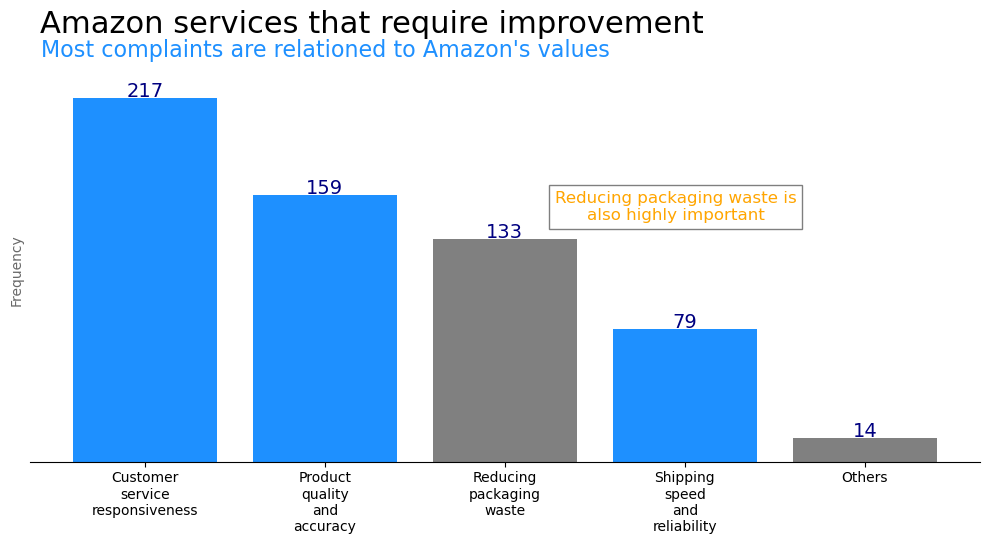

In [119]:
# Plotting the graph
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(df_improvement['Improvement_Areas'], df_improvement['Count'],
       color=['dodgerblue', 'dodgerblue', 'grey','dodgerblue', 'grey'] )

# Removing lines
ax.set_yticks([])
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# adding values to columns
for i, v in enumerate(df_improvement['Count']):
    ax.text(i, v + 0.5, str(v), ha='center', color='navy', fontsize=14)

# Title
plt.title('Amazon services that require improvement',  fontweight='roman', 
          fontsize=22, x=0.36, y=1.1)

plt.suptitle("Most complaints are relationed to Amazon's values", x=0.33, y=0.85, 
             fontweight='light', color='dodgerblue', fontsize=16)

ax.set_ylabel('Frequency', color='dimgray')
ax.set_xlabel('')

# Ajustando as variáveis do eixo X
new_labels = [label.replace(' ', '\n') for label in df_improvement['Improvement_Areas']]
ax.set_xticks(range(len(new_labels)))  # Ajustar ticks
ax.set_xticklabels(new_labels, ha='center')

# Adicionar insights ao gráfico
insight_text = "Reducing packaging waste is\nalso highly important"
ax.text(2.95, max(df_improvement['Count']) * 0.7, insight_text, 
        ha='center', va='center', fontsize=12, color='orange', 
        bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()

### What steps can we take if we reduce customer service responsiveness and product quality complaints by 20%? We can achieve this progressively—1% in the first month, 2% in the second month, and so on, reaching 19% after six months. By reducing packaging waste, we can also lower costs, allowing us to allocate more resources to address the areas that need the most improvement. Additionally, we can enhance our shipping speed, which is one of our key differentiator.

In [120]:
## preciso ver como diminuir as reclamações pode impactar a satisfação dos clientes

In [ ]:
# 6 months later

# case 1:   -19%
['Customer service responsiveness'] = 178
['Product quality and accuracy'] = 129

# case 2:   - waste    + shipping speed

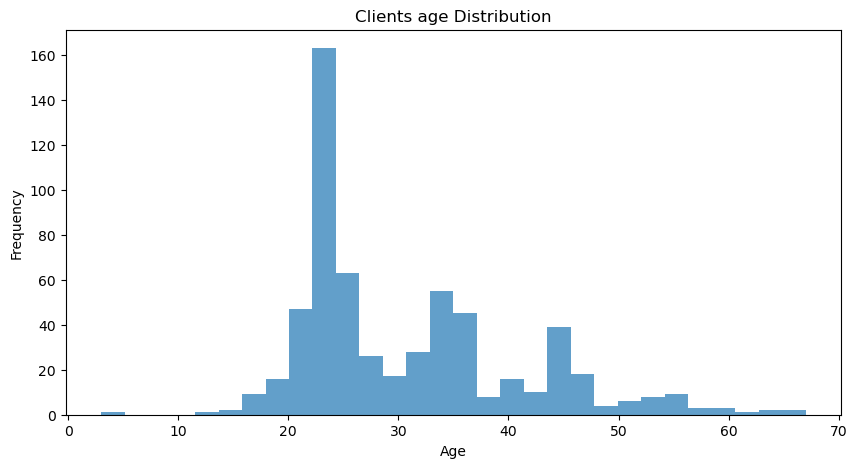

In [121]:
plt.subplots(figsize=(10,5))
plt.title('Clients age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Limpa o gráfico anterior e plota com os eixos invertidos
plt.hist(df['age'], bins=30, alpha=0.7)

plt.show()

plt.show()